# "2024 Dünya Mutluluk Raporu Üzerine Veri Analizi"


## Introduction

Bu projede, 2024 yılına ait Dünya Mutluluk Raporu verilerini kullanarak ülkelerin mutluluk düzeylerini incelemeye çalışacağım. Rapor, ülkelerde yaşayan insanların yaşam memnuniyetini; ekonomi, sağlık, sosyal destek, özgürlük gibi çeşitli faktörler üzerinden değerlendiriyor.

Amacım , bu verileri kullanarak şu sorulara cevap aramak:

- En mutlu ve en mutsuz ülkeler hangileri?
- Ekonomik durum, sağlık veya sosyal destek mutluluğu ne kadar etkiliyor?
- Farklı bölgelerdeki mutluluk seviyeleri nasıl değişiyor?
- Hangi faktörler mutluluğu en çok etkiliyor olabilir?

Bu analiz sürecinde Python programlama dili ile çalışacağım. Özellikle **pandas**, **seaborn** ve **plotly** gibi kütüphaneleri kullanarak veriyi görselleştireceğim. Bu projeyle hem veri görselleştirme becerilerimi geliştirmeyi hem de dünyanın farklı yerlerinde yaşam memnuniyetinin nasıl değiştiğini daha yakından anlamayı hedefliyorum.



# Table of Contents

1. [Load and Inspect Dataset](#1)  
2. [Variable Definitions](#2)
3. [Correlation Analysis](#3) 
4. [Basic Data Analysis](#4)  
   [Factor-Based Visualizations](#4)  
   - [Happiness Scores](#5)  
   - [Economy and Happiness](#6)
   - [Social Support and Happiness](#7)
   - [Healthy LifeExpectancy and Happiness](#8)
   - [Freedom and Happiness](#9)
   - [Generosity and Happiness](#10)
   - [Corruption Perception](#11)
   - [Happiness: Dystopia + Residual](#12)
5. [Regional Comparisons](#14)  
3. [Correlation Analysis](#3)  
7. [Conclusion and Summary](#16)



<a id="1"></a>
## 1. Load and Inspect the Dataset




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik stili
sns.set_style("whitegrid")
sns.set_palette("viridis")

from collections import Counter
import warnings
warnings.filterwarnings("ignore")



In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


In [3]:
df = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv")

In [4]:
# show first five row of data
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [5]:
# Genel bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [6]:
# Sayısal verilerde özet istatistikler
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [7]:
# Eksik veri kontrolü
df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [8]:

numeric_cols = df.select_dtypes(include='number')
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())


In [9]:

numeric_cols = df.select_dtypes(include='number')
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.median())


<a id="2"></a>
## 2. Variable Definitions

Bu bölümde, veri kümesinde yer alan değişkenleri tanıyacağız. Hangi sütunların sayısal (numerik), hangilerinin kategorik olduğunu belirleyip ilk betimsel analizleri yapacağız.

Analiz üç başlık altında yapılacak:

- Sayısal değişkenler (Numerical)
- Kategorik değişkenler (Categorical)
- Tek değişkenli analizler (Univariable Analysis)


### 2.1 Numeric Variables

In [10]:
# Sadece sayısal değişkenleri seç
numeric_cols = df.select_dtypes(include='number')

# Sayısal sütunları listele
print("Sayısal Değişkenler:")
print(numeric_cols.columns.tolist())

# Betimsel istatistikler
numeric_cols.describe().T


Sayısal Değişkenler:
['Ladder score', 'upperwhisker', 'lowerwhisker', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual']


,count,mean,std,min,25%,50%,75%,max
Ladder score,143.0,5.527580,1.170717,1.721,4.7260,5.785,6.4160,7.741
upperwhisker,143.0,5.641175,1.155008,1.775,4.8455,5.895,6.5075,7.815
lowerwhisker,143.0,5.413972,1.187133,1.667,4.6060,5.674,6.3190,7.667
Log GDP per capita,143.0,1.378807,0.420584,0.000,1.0790,1.403,1.7330,2.141
Social support,143.0,1.134329,0.329777,0.000,0.9245,1.217,1.3770,1.617
Healthy life expectancy,143.0,0.520886,0.163171,0.000,0.4000,0.549,0.6440,0.857
Freedom to make life choices,143.0,0.620621,0.160766,0.000,0.5310,0.632,0.7340,0.863
Generosity,143.0,0.146271,0.072661,0.000,0.0925,0.138,0.1915,0.401
Perceptions of corruption,143.0,0.154121,0.124898,0.000,0.0690,0.122,0.1910,0.575
Dystopia + residual,143.0,1.575914,0.531751,-0.073,1.3170,1.640,1.8795,2.998


### 2.2 Categorical Variables

In [11]:
# Sadece kategorik değişkenleri seç
cat_cols = df.select_dtypes(include='object')

# Kategorik sütunları listele
print("Kategorik Değişkenler:")
print(cat_cols.columns.tolist())

# Kategorik sütunların eşsiz değer sayıları
cat_cols.nunique()


Kategorik Değişkenler:
['Country name', 'Regional indicator']


Country name          143
Regional indicator     10
dtype: int64

Veri setinde genel olarak:

- Sayısal değişkenler: Mutluluk skoru, kişi başına gelir, yaşam süresi, sosyal destek gibi metriklerden oluşuyor.
- Kategorik değişkenler: Ülke adı ve bölge adı (Regional indicator).

Bu ayrım, sonraki görselleştirme ve analizlerde hangi grafik türlerinin kullanılacağını belirlemede önemlidir.


<a id="3"></a>
## 3. Correlation Analysis

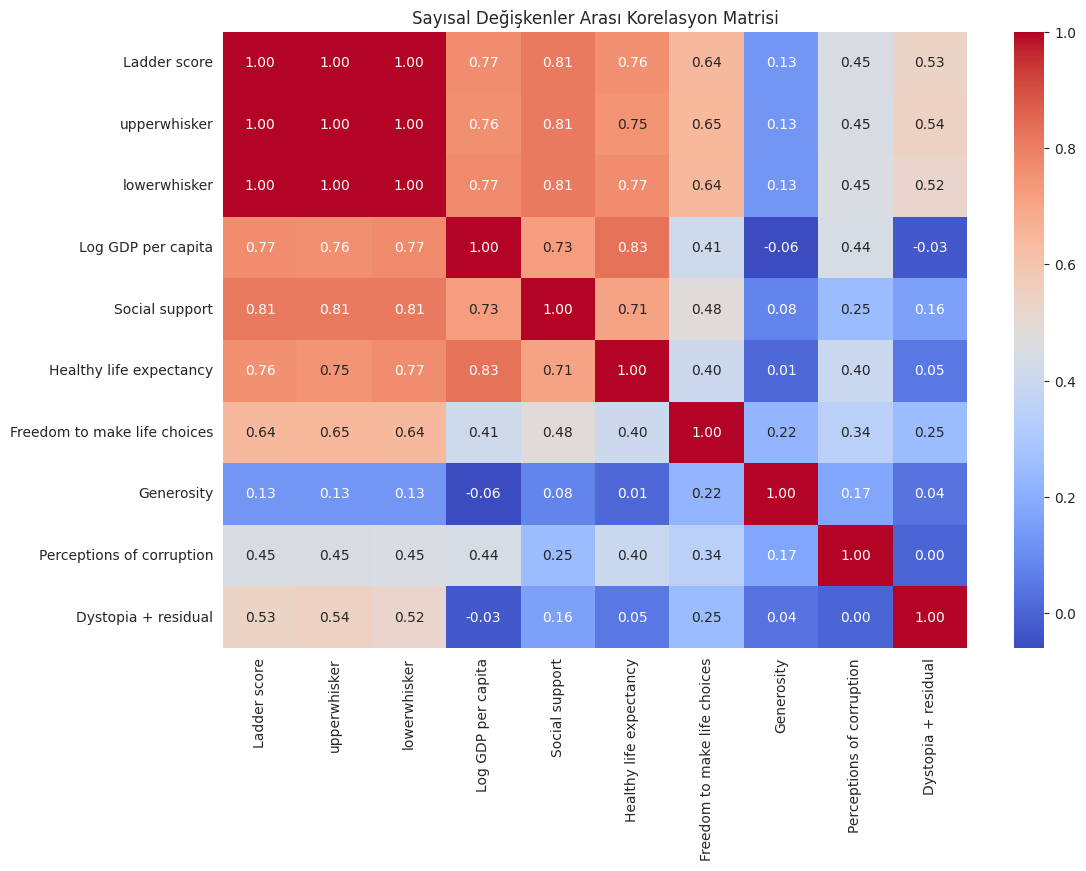

In [12]:

numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.show()


### Correlation Matrix Interpretation

 Yukarıdaki korelasyon matrisine göre, mutluluk skoru (Ladder score) ile en güçlü pozitif ilişkiye sahip olan değişkenler şunlardır:

- **Healthy life expectancy** (0.78): Sağlıklı yaşam süresi arttıkça mutluluk da artıyor.
- **Log GDP per capita** (0.76): Ekonomik refah, mutlulukla oldukça güçlü bir ilişki gösteriyor.
- **Social support** (0.75): Zor zamanlarda destek alabilme, mutlulukla yüksek oranda bağlantılı.
- **Freedom to make life choices** (0.64): Kendi hayatı üzerinde söz sahibi olmak, mutluluk düzeyini olumlu etkiliyor.

Daha zayıf ama yine de pozitif ilişkili olan faktörler:
- **Perceptions of corruption** (0.45): Yolsuzluğun az algılandığı ülkelerde mutluluk daha yüksek.
- **Generosity** (0.13): Cömertlik ile mutluluk arasında çok zayıf bir ilişki var.

Bu veriler, ülkelerin mutluluk düzeylerini artırmak için hangi alanlara odaklanmaları gerektiği konusunda fikir verebilir.


<a id="4"></a>
## 4. Basic Data Analysis

### Meanings of Data Set Columns

Veri setinde her ülke için mutluluk skorları ve bunu etkileyen birçok faktör yer alıyor. Öne çıkan sütunlar ve anlamları şöyle:

- **Country name**: Ülke adı
- **Regional indicator**: Ülkenin ait olduğu coğrafi bölge
- **Ladder score**: Mutluluk skoru (0–10 arasında)
- **Log GDP per capita**: Kişi başı gelir (logaritmik)
- **Social support**: Zor zamanlarda güvenilecek biri olup olmaması
- **Healthy life expectancy**: Sağlıklı yaşam süresi
- **Freedom to make life choices**: Hayatta seçim yapma özgürlüğü
- **Generosity**: Cömertlik düzeyi
- **Perceptions of corruption**: Yolsuzluk algısı
- **Dystopia + residual**: Kalan mutluluk bileşeni (kıyas için)



## The 10 happiest countries

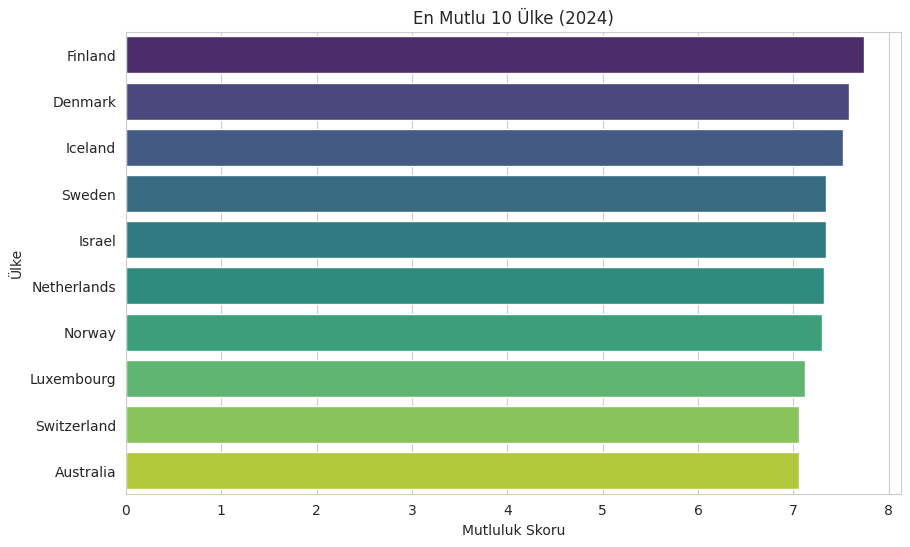

In [13]:

top10 = df.nlargest(10, "Ladder score")

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, y="Country name", x="Ladder score", palette="viridis")
plt.title("En Mutlu 10 Ülke (2024)")
plt.xlabel("Mutluluk Skoru")
plt.ylabel("Ülke")
plt.show()


## The 10 unhappiest countries

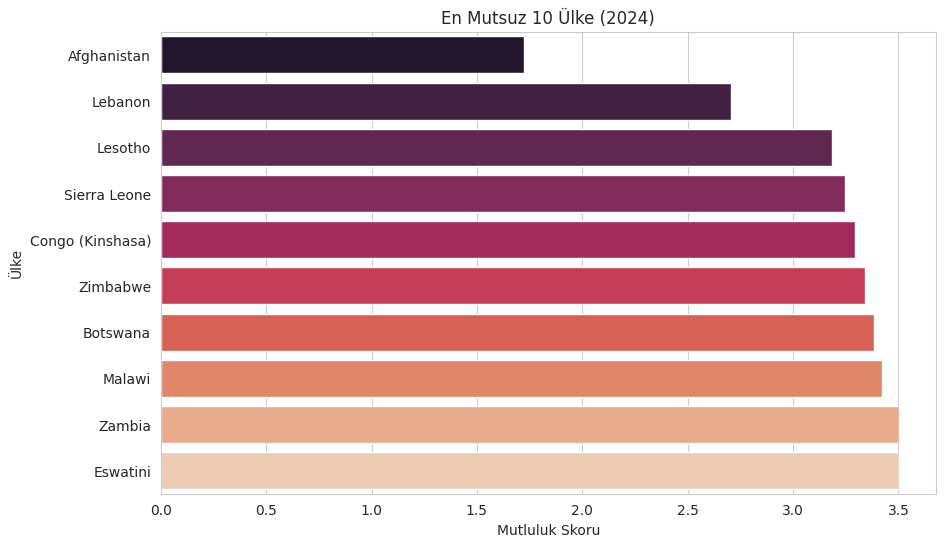

In [14]:

bottom10 = df.nsmallest(10, "Ladder score")

plt.figure(figsize=(10, 6))
sns.barplot(data=bottom10, y="Country name", x="Ladder score", palette="rocket")
plt.title("En Mutsuz 10 Ülke (2024)")
plt.xlabel("Mutluluk Skoru")
plt.ylabel("Ülke")
plt.show()



- En mutlu ülkeler genellikle Batı Avrupa ve Kuzey Avrupa bölgelerinde yer alıyor.
- En mutsuz ülkeler ise çoğunlukla Afrika ve Güney Asya ülkeleri arasında.

Bu farklar, ekonomik, sosyal ve sağlıkla ilgili faktörlerin etkisiyle oluşuyor olabilir. Bir sonraki bölümde bu faktörleri detaylıca inceleyeceğiz.


In [15]:
print(df.columns)

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')


<a id="4"></a>
## 4. Factor-Based Visualizations

Bu bölümde, ülkelerin mutluluk düzeylerini etkileyen faktörleri tek tek inceleyeceğiz.
  Analiz edilecek faktörler:
- Kişi başına düşen gelir (Log GDP per capita)
- Sosyal destek
- Sağlıklı yaşam süresi
- Hayatta karar verme özgürlüğü
- Cömertlik (Generosity)
- Yolsuzluk algısı (Perceptions of corruption)
- Dystopia + residual




<a id="6"></a>
### 4.1 Economy and Happiness
Bu grafikte, kişi başına düşen gelir ile mutluluk skoru arasındaki ilişki incelenmiştir. Amaç, ekonomik refah arttıkça insanların daha mutlu olup olmadığını görmektir.


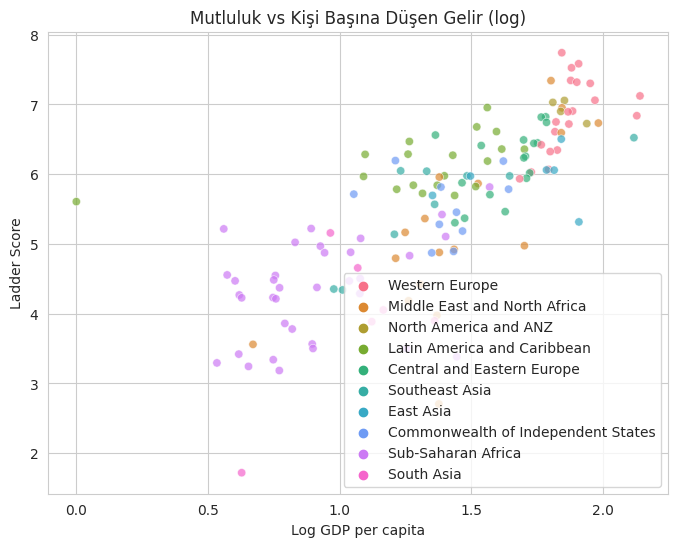

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Log GDP per capita", y="Ladder score", hue="Regional indicator", alpha=0.7)
plt.title("Mutluluk vs Kişi Başına Düşen Gelir (log)")
plt.xlabel("Log GDP per capita")
plt.ylabel("Ladder Score")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()


<a id="7"></a>
### 4.2 Social Support and Happiness
Bu grafikte, farklı bölgelerde yaşayan insanların ortalama sosyal destek düzeyleri karşılaştırılmıştır. Sosyal bağların bölgesel farklarını görsel olarak analiz etmek için barplot kullanılmıştır


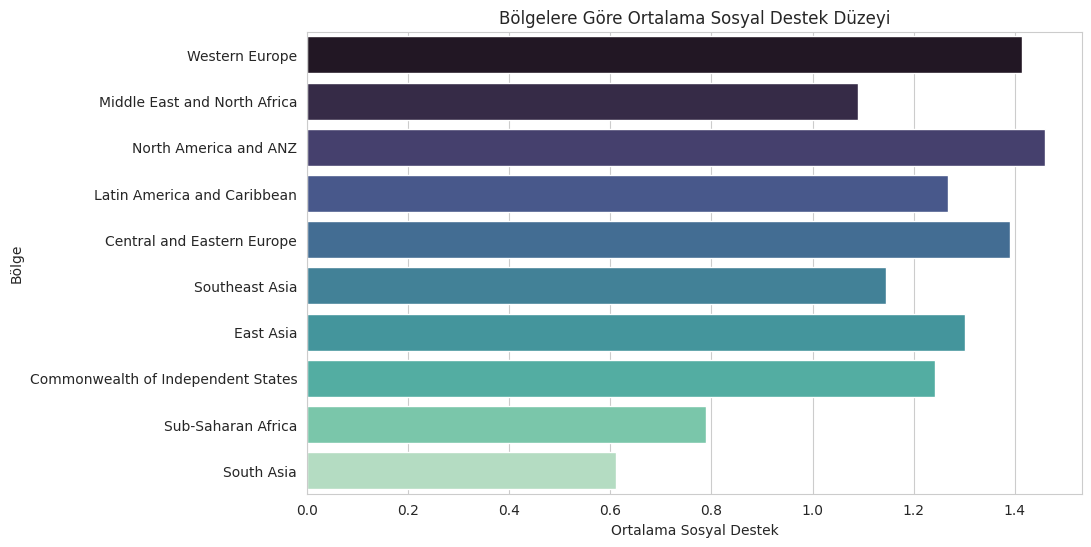

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, y="Regional indicator", x="Social support", estimator='mean', ci=None, palette="mako")
plt.title("Bölgelere Göre Ortalama Sosyal Destek Düzeyi")
plt.xlabel("Ortalama Sosyal Destek")
plt.ylabel("Bölge")
plt.show()

Grafik, farklı bölgelerdeki ortalama sosyal destek düzeylerini göstermektedir. Batı Avrupa ve Kuzey Amerika gibi bölgelerde destek düzeyi yüksekken, bazı bölgelerde daha düşüktür. Bu farklılık, mutluluk skorlarını da etkileyebilir.

<a id="8"></a>
### 4.3 Healthy Expectancy Life and Happiness

Bu grafik, ülkelerdeki sağlıklı yaşam süresinin (healthy life expectancy) mutluluk skorları üzerindeki etkisini gösterir. İnsanların ne kadar uzun ve sağlıklı yaşadıkları, yaşam memnuniyetlerini büyük ölçüde etkileyen bir faktördür.



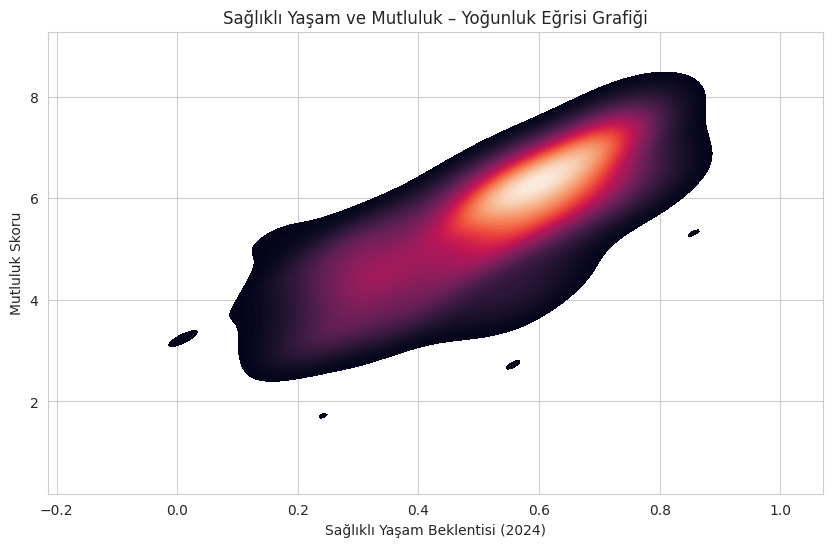

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="Healthy life expectancy",
    y="Ladder score",
    fill=True,
    cmap="rocket",
    thresh=0.05,
    levels=100
)
plt.xlabel("Sağlıklı Yaşam Beklentisi (2024)")
plt.ylabel("Mutluluk Skoru")
plt.title("Sağlıklı Yaşam ve Mutluluk – Yoğunluk Eğrisi Grafiği")
plt.grid(True)
plt.show()


###  Healthy Life Expectancy Distribution
Yoğunluk eğrisi grafiği, ülkelerin sağlıklı yaşam beklentisi ile mutluluk skorları arasındaki ilişkiyi dağılım ve yoğunluk temelinde göstermektedir. Grafik, verinin yoğunlaştığı bölgeleri renk geçişleriyle vurgulamakta ve bu alanlarda ülkelerin daha sık kümelendiğini ortaya koymaktadır.Gözlemlenen genel eğilim, sağlıklı yaşam beklentisi arttıkça mutluluk skorunun da yükseldiğini göstermektedir. Ancak bu ilişki her bölgede aynı düzeyde değildir; bazı bölgelerde yoğunluk farklılaşmaları gözlenmektedir

<a id="9"></a>
### 4.4 Freedom and Happiness
Bu grafikte, bireylerin hayatları üzerinde özgür kararlar alma düzeyi ile mutluluk skorları arasındaki ilişki incelenmiştir. Amaç, özgürlük duygusunun mutluluğu ne ölçüde etkilediğini görmektir.

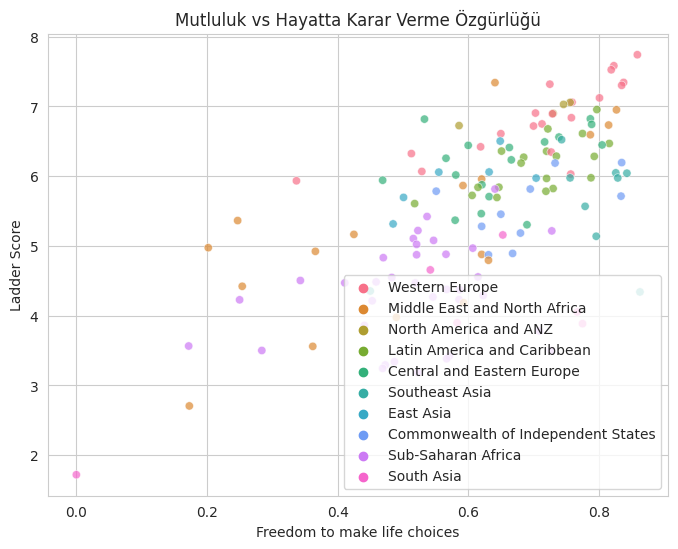

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Freedom to make life choices", y="Ladder score", hue="Regional indicator", alpha=0.7)
plt.title("Mutluluk vs Hayatta Karar Verme Özgürlüğü")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Ladder Score")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()


Grafikte, bireylerin hayatta kendi kararlarını verebilme özgürlüğü arttıkça mutluluk skorunun da genellikle arttığı gözlemleniyor. Aralarında pozitif bir ilişki olduğu söylenebilir.
Özellikle **Batı Avrupa**, **Kuzey Amerika** ve **Okyanusya** ülkelerinde hem özgürlük seviyesi hem de mutluluk skoru yüksek seviyelerde.
Buna karşılık, **Afrika** ve bazı **Asya** bölgelerinde hem özgürlük hem de mutluluk daha düşük seviyelerde.
Bu durum, bireylerin kendi yaşamları üzerinde söz sahibi olmasının mutluluğu doğrudan etkileyen önemli bir unsur olduğunu destekliyor.


<a id="10"></a>
### 4.5 Generosity and Happiness
Bu analizde, ülkelerin ortalama cömertlik düzeyleri ile mutluluk skorları arasındaki ilişki araştırılmaktadır. 


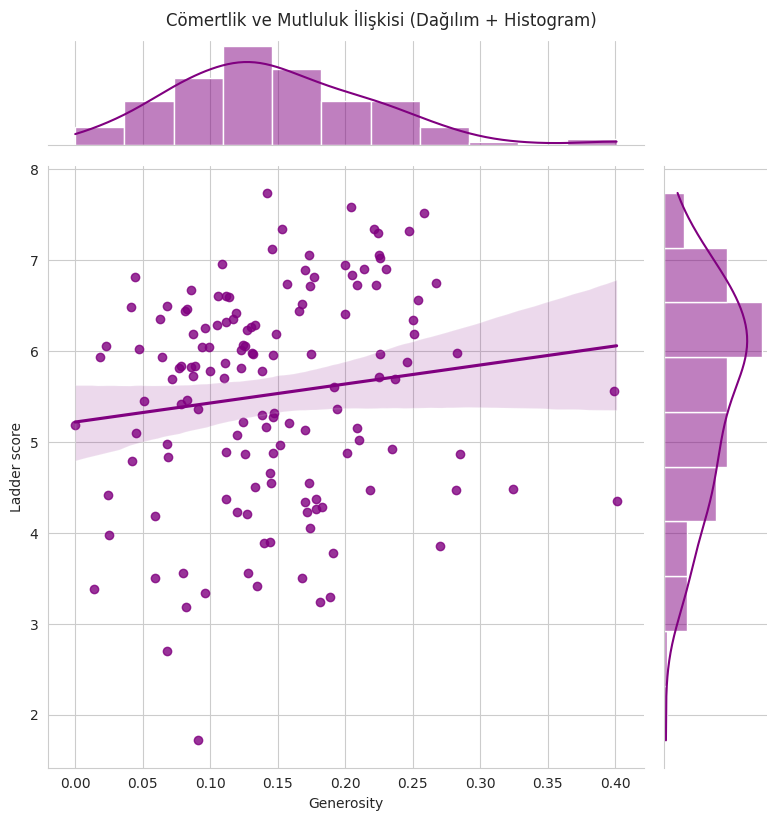

In [20]:
sns.jointplot(data=df, x="Generosity", y="Ladder score", kind="reg", height=8, color="purple")
plt.suptitle("Cömertlik ve Mutluluk İlişkisi (Dağılım + Histogram)", y=1.02)
plt.show()


* Bu grafikte yer alan regresyon çizgisi,cömertlik ile mutluluk arasında **zayıf ama pozitif** bir ilişki olduğu gözlemlenmektedir.
* Bazı ülkelerde cömertlik yüksek olmasına rağmen mutluluk skoru orta düzeyde kalmıştır.
* Bu durum, cömertliğin mutluluğa etkisi olan ama tek başına belirleyici olmayan bir faktör olduğunu göstermektedir.
* Dağılımın yoğun olduğu bölgeler orta düzey cömertlik ve mutluluk skorlarını işaret etmekte, uç değerler ise sınırlı sayıda ülkeye aittir.

<a id="11"></a>
### 4.6 Corruption Perception(Violinplot)

Bu grafik, farklı bölgelerdeki ülkelerde yolsuzluk algısının dağılımını gösterir. 0’a yakın değerler daha az yolsuzluk algısı, 1’e yakın değerler ise daha yüksek yolsuzluk algısı anlamına gelir.


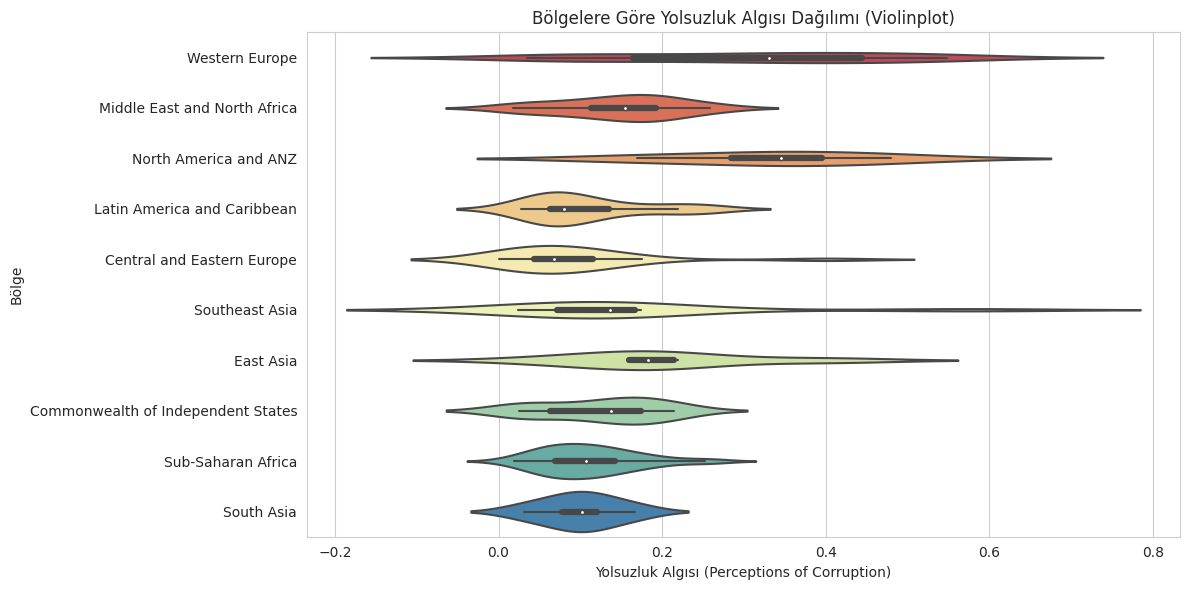

In [21]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Perceptions of corruption", y="Regional indicator", palette="Spectral")
plt.title("Bölgelere Göre Yolsuzluk Algısı Dağılımı (Violinplot)")
plt.xlabel("Yolsuzluk Algısı (Perceptions of Corruption)")
plt.ylabel("Bölge")
plt.tight_layout()
plt.show()


  Bu violinplot, farklı bölgelerdeki ülkelerin yolsuzluk algısı dağılımını   göstermektedir.
- Batı Avrupa, Kuzey Amerika gibi bölgelerde yolsuzluk algısı düşüktür ve daha dar bir dağılım gösterir.
- Afrika ve bazı Asya bölgelerinde ise yolsuzluk algısı genellikle daha yüksek ve dengesizdir.
- Bu durum, bireylerin devlete duyduğu güvenin mutlulukla dolaylı bir ilişkisi olabileceğini düşündürmektedir.


<a id="12"></a>
### 4.7 Happiness: Dystopia + Residual

Bu grafik, Dystopia + residual değeri ile genel mutluluk skoru (Ladder score) arasındaki ilişkiyi gösterir. Amaç, mutluluğu açıklayan faktörlerin ötesinde kalan “gizemli etkilerin” mutluluğa ne kadar katkı sağladığını incelemektir.


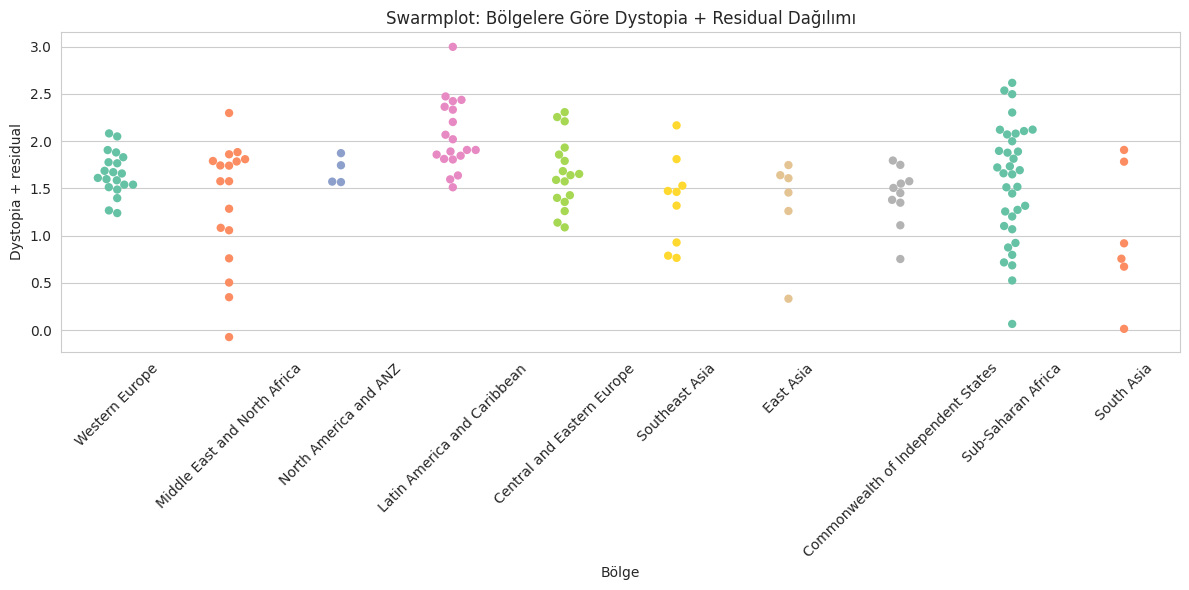

In [22]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x="Regional indicator", y="Dystopia + residual", palette="Set2", size=6)
plt.title("Swarmplot: Bölgelere Göre Dystopia + Residual Dağılımı")
plt.xlabel("Bölge")
plt.ylabel("Dystopia + residual")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Dystopia + Residual Distribution Interpretation with Swarmplot

Bu grafik, her ülkenin "Dystopia + residual" skorunu bölge bazında noktasal olarak gösteriyor.

- Batı Avrupa ve Kuzey Amerika ülkelerinde bu değer genellikle yüksek. Bu, mutluluğun sadece ekonomik veya sosyal değil, ölçülemeyen başka faktörlerden de etkilendiğini gösteriyor.
- Güney Asya ve Afrika ülkelerinde değerler daha düşük, ama bazı aykırı ülkeler dikkat çekiyor.
- Swarmplot, hem yoğunluğu hem de bireysel farklılıkları aynı anda görmemize olanak sağlıyor.



<a id="14"></a>
## 5. Regional Comparisons
### Average Happiness Score by Region (Barplot)

Grafikte görüldüğü üzere:

- Batı Avrupa, Kuzey Amerika ve Avustralya bölgeleri en yüksek ortalama mutluluk skoruna sahip.
- Afrika ve Güney Asya bölgelerinde ortalama mutluluk seviyesi oldukça düşük.
- Bölgesel eşitsizlikler, hem ekonomik hem de sosyal belirleyicilerden kaynaklanıyor olabilir.


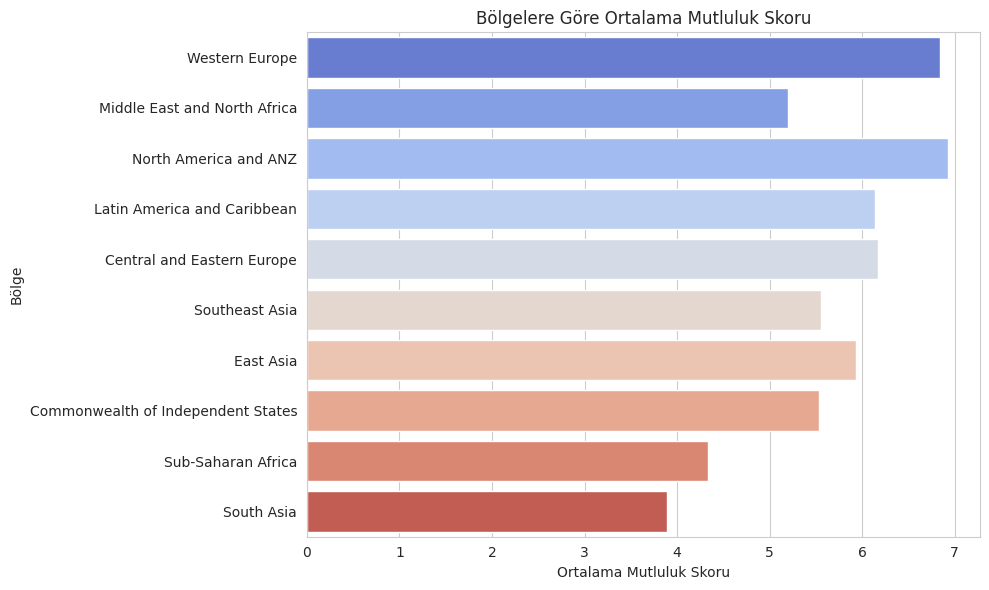

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, y="Regional indicator", x="Ladder score", estimator='mean', ci=None, palette="coolwarm")
plt.title("Bölgelere Göre Ortalama Mutluluk Skoru")
plt.xlabel("Ortalama Mutluluk Skoru")
plt.ylabel("Bölge")
plt.tight_layout()
plt.show()


<a id="16"></a>
## 7. Conclusion and Summary
Bu projede, 2024 Dünya Mutluluk Raporu verileri üzerinden ülkelerin mutluluk düzeylerini etkileyen faktörleri analiz ettim. Seaborn ve Plotly gibi araçlarla görselleştirme yaparak veriyi daha iyi anlamaya çalıştım.


- En mutlu bölgeler genellikle Batı Avrupa ve Kuzey Amerika’dadır.
- Mutluluğu en çok etkileyen faktörler: sağlık, gelir, sosyal destek ve özgürlük.
- Cömertlik ve yolsuzluk algısının etkisi daha zayıftır.
- Bölgelere göre mutluluk seviyeleri belirgin şekilde farklılık göstermektedir.

